# Linear Regression Consulting Project

Congratulations! You've been contracted by Hyundai Heavy Industries to help them build a predictive model for some ships. [Hyundai Heavy Industries](http://www.hyundai.eu/en) is one of the world's largest ship manufacturing companies and builds cruise liners.

You've been flown to their headquarters in Ulsan, South Korea to help them give accurate estimates of how many crew members a ship will require.

They are currently building new ships for some customers and want you to create a model and use it to predict how many crew members the ships will need.

Here is what the data looks like so far:

    Description: Measurements of ship size, capacity, crew, and age for 158 cruise
    ships.


    Variables/Columns
    Ship Name     1-20
    Cruise Line   21-40
    Age (as of 2013)   46-48
    Tonnage (1000s of tons)   50-56
    passengers (100s)   58-64
    Length (100s of feet)  66-72
    Cabins  (100s)   74-80
    Passenger Density   82-88
    Crew  (100s)   90-96
    
It is saved in a csv file for you called "cruise_ship_info.csv". Your job is to create a regression model that will help predict how many crew members will be needed for future ships. The client also mentioned that they have found that particular cruise lines will differ in acceptable crew counts, so it is most likely an important feature to include in your analysis! 

Once you've created the model and tested it for a quick check on how well you can expect it to perform, make sure you take a look at why it performs so well!

# LETS GET STARTED !

## SPARK SESSION

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("personal_project").getOrCreate()

23/08/15 18:59:19 WARN Utils: Your hostname, Blade-15-Base-Model resolves to a loopback address: 127.0.1.1; using 192.168.1.231 instead (on interface wlo1)
23/08/15 18:59:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/15 18:59:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/15 18:59:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# READING THE DATA

In [4]:
data = spark.read.csv('cruise_ship_info.csv', inferSchema=True, header=True)

In [5]:
data.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [6]:
data.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

# SET UP THE INPUTS AND OUTPUTS OF THE ML MODEL

In [7]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [8]:
data.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

## Creating an assembler Object

In [9]:
assembler = VectorAssembler(inputCols=['Age','Tonnage','passengers','length','cabins','passenger_density'],
                            outputCol='features')

## Transform the data

In [10]:
output = assembler.transform(data)

In [11]:
output.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)
 |-- features: vector (nullable = true)



In [12]:
final_data = output.select('features','crew')

In [13]:
final_data.show()

+--------------------+----+
|            features|crew|
+--------------------+----+
|[6.0,30.276999999...|3.55|
|[6.0,30.276999999...|3.55|
|[26.0,47.262,14.8...| 6.7|
|[11.0,110.0,29.74...|19.1|
|[17.0,101.353,26....|10.0|
|[22.0,70.367,20.5...| 9.2|
|[15.0,70.367,20.5...| 9.2|
|[23.0,70.367,20.5...| 9.2|
|[19.0,70.367,20.5...| 9.2|
|[6.0,110.23899999...|11.5|
|[10.0,110.0,29.74...|11.6|
|[28.0,46.052,14.5...| 6.6|
|[18.0,70.367,20.5...| 9.2|
|[17.0,70.367,20.5...| 9.2|
|[11.0,86.0,21.24,...| 9.3|
|[8.0,110.0,29.74,...|11.6|
|[9.0,88.5,21.24,9...|10.3|
|[15.0,70.367,20.5...| 9.2|
|[12.0,88.5,21.24,...| 9.3|
|[20.0,70.367,20.5...| 9.2|
+--------------------+----+
only showing top 20 rows



# SPLIT TRAIN TEST

In [14]:
train_data , test_data = final_data.randomSplit([0.7,0.3])

In [15]:
from pyspark.ml.regression import LinearRegression

In [16]:
lr = LinearRegression(labelCol='crew')

In [17]:
lr_model = lr.fit(train_data)

23/08/15 19:18:21 WARN Instrumentation: [089e621c] regParam is zero, which might cause numerical instability and overfitting.


In [18]:
test_result = lr_model.evaluate(test_data)

In [20]:
test_result.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|  -0.506200413817079|
|  -0.506200413817079|
| -0.3357606528135211|
|  0.7830028197362289|
| -0.6809141162675676|
| -0.8878397053175267|
| -0.6672458589332635|
|  0.1432169744753118|
| -0.6120163095285474|
|-0.44503310233265303|
|  1.6807394556670836|
| -1.2309738050434014|
|-0.24593587974788234|
|  0.6923248979729202|
|  -1.327468846814373|
| -0.4758515641920802|
| 0.05473332140098641|
|-0.16107053057275333|
| 0.15739923668256317|
| -0.7430826949496065|
+--------------------+
only showing top 20 rows



# METRICS

In [21]:
test_result.rootMeanSquaredError

0.8217395435635378

In [22]:
test_result.r2

0.923261401072289

# UNLABELED DATA

In [23]:
unlabeled_data = test_data.select('features')

In [24]:
unlabeled_data.show()

+--------------------+
|            features|
+--------------------+
|[6.0,30.276999999...|
|[6.0,30.276999999...|
|[7.0,158.0,43.7,1...|
|[8.0,91.0,22.44,9...|
|[8.0,110.0,29.74,...|
|[9.0,90.09,25.01,...|
|[9.0,110.0,29.74,...|
|[10.0,68.0,10.8,7...|
|[10.0,90.09,25.01...|
|[10.0,91.62700000...|
|[10.0,151.4,26.2,...|
|[11.0,138.0,31.14...|
|[12.0,25.0,3.88,5...|
|[12.0,77.104,20.0...|
|[12.0,88.5,21.24,...|
|[12.0,90.09,25.01...|
|[12.0,108.865,27....|
|[13.0,25.0,3.82,5...|
|[13.0,30.27699999...|
|[13.0,61.0,13.8,7...|
+--------------------+
only showing top 20 rows



In [25]:
predictions = lr_model.transform(unlabeled_data)

In [26]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[6.0,30.276999999...| 4.056200413817079|
|[6.0,30.276999999...| 4.056200413817079|
|[7.0,158.0,43.7,1...| 13.93576065281352|
|[8.0,91.0,22.44,9...|10.216997180263771|
|[8.0,110.0,29.74,...|12.280914116267567|
|[9.0,90.09,25.01,...| 9.577839705317526|
|[9.0,110.0,29.74,...|12.267245858933263|
|[10.0,68.0,10.8,7...|6.2167830255246885|
|[10.0,90.09,25.01...| 9.192016309528547|
|[10.0,91.62700000...| 9.445033102332653|
|[10.0,151.4,26.2,...|10.849260544332916|
|[11.0,138.0,31.14...|13.080973805043401|
|[12.0,25.0,3.88,5...|3.1159358797478824|
|[12.0,77.104,20.0...|  8.89767510202708|
|[12.0,88.5,21.24,...|10.627468846814374|
|[12.0,90.09,25.01...|  9.15585156419208|
|[12.0,108.865,27....|10.945266678599014|
|[13.0,25.0,3.82,5...|3.1110705305727535|
|[13.0,30.27699999...| 3.842600763317437|
|[13.0,61.0,13.8,7...|6.7430826949496065|
+--------------------+------------

# CHECK THE CORRELATION BETWEEN THE COLUMNS

In [27]:
from pyspark.sql.functions import corr

In [28]:
data.corr

<bound method DataFrame.corr of DataFrame[Ship_name: string, Cruise_line: string, Age: int, Tonnage: double, passengers: double, length: double, cabins: double, passenger_density: double, crew: double]>

In [30]:
from pyspark.ml.stat import Correlation

# Compute the correlation matrix
corr_matrix = Correlation.corr(output, "features").head()

# Convert the correlation matrix to a DataFrame
corr_df = spark.createDataFrame(corr_matrix[0].toArray())


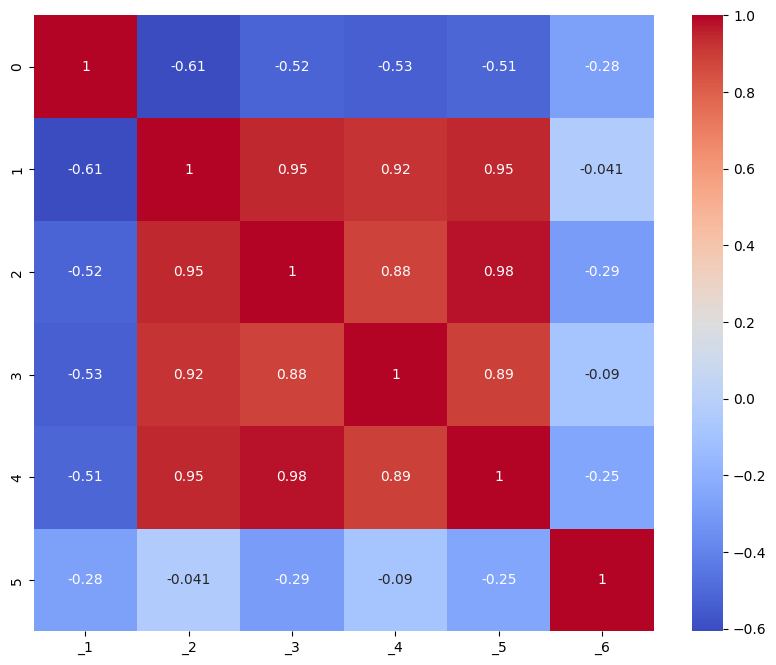

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = corr_df.toPandas()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pandas_df, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [33]:
data.select(corr('crew', 'passengers')).show()

+----------------------+
|corr(crew, passengers)|
+----------------------+
|    0.9152341306065384|
+----------------------+



In [34]:
data.select(corr('crew', 'cabins')).show()

+------------------+
|corr(crew, cabins)|
+------------------+
|0.9508226063578497|
+------------------+

